## Machine Learning Model Building Pipeline: Data Preparation & Exploratory Data Analysis (EDA)

In this section, we will cover practical examples of data preparation and exploratory data analysis with generic data sets to illustrate various ways to understand data and do basic EDA. For ease of understanding, we will create a separate notebook for each of the following parts of the Machine Learning pipeline. 
1. Data preparation and Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for Data preparation and Exploratory Data Analysis (EDA)**

We will use the house price dataset available on [Kaggle.com]
<br/>(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 
<br/>See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning regression model to predict the price of home based on different attributes of the house. Obviously, being able to predict the price of the house is of great importance to both the buyer and seller of the house in addition to investors (to figure out whether the proposed price is either over estimated or under estimated)

### Goal of the modeling problem

The goal of the project is to predict the price of the house as close as possible to the actual sale price historically.

### Data for the problem

The data can be downloaded from the following website
<br/>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<br/>Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'Housing_Data.csv' and save it in a directory named "DataSets".

====================================================================================================

## House Prices dataset: Data Analysis

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. I will take you through the different aspects of the analysis that we will make over the variables, and introduce you to the meaning of each of the variables as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

This section of the analysis will walk you through analyzing data in detail.

Let's go ahead and load the dataset.

In [249]:
# To handle datasets we make the following standard imports
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# This ensures that the plots are made immediately after the code

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
# to display data with high width
pd.set_option('display.width', 1000)

In [250]:
# Make the output of notebook stable across runs by setting randon seed
np.random.seed(42)

# To make the pictures pretty
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set up directories to work with datasets and images
PROJECT_ROOT_DIR = os.getcwd()
DATASET_FOLDER = "DataSets"    # Data goes into the DataSets folder
IMAGES_FOLDER = "IMAGES"       # Images go into IMAGES folder

DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, DATASET_FOLDER)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_FOLDER)

def load_data(filename, dataset_path=DATASET_PATH):
    """Helper Function to load data from the Data directory. Inputs are file name and directory where datasets are stored"""
    file_with_path = os.path.join(dataset_path, filename)
    return pd.read_csv(file_with_path)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Helper Function to save data. Inputs are file name and directory where datasets are stored"""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [251]:
data = load_data(filename="Housing_Data.csv")

# visualise the dataset by printing the first two rows
print("\nThe first 5 rows of data frame:")
data.head(5)

######## DELETE BEFORE UPLOAD#########
# cols = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope']
# data[cols].head(3)


The first 5 rows of data frame:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
# Print the list of columns in the data
cols_list = data.columns.tolist()
print(f"There are totally {len(cols_list)} variables in dataset and these are listed below \n")
print(cols_list)

There are totally 81 variables in dataset and these are listed below 

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorc

**We will analyze the data, types of columns and some basic data statistics for out sales price data:**

In [253]:
# Print out the types of data columns
print("\nThe types of data columns are: \n")
print(data.dtypes)
# Print out the statistics of dataset
print(f"\nData Dimensions (rows, columns): {data.shape} \n\nThe statistics of the numerial records are below: ")
data.describe()

# ######## DELETE BEFORE UPLOAD#########
# cols = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope']
# data[cols].describe()


The types of data columns are: 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType      

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**We will analyse the dataset to identify various aspects of the data as shown below:**

1. Remove duplicate columns if any
2. Remove columns with constant or quasi-constant values (as they add no value to analysis)
3. Missing values
4. Numerical variables
5. Distribution of the numerical variables
6. Outliers
7. Categorical variables
8. Cardinality of the categorical variables
9. Potential relationship between the variables and the target: SalePrice
10. Remove variables with very high correlation

### Remove duplicate columns if any
In many cases, it is common that the daata columns are duplicated in databases for various business reasons with different column names. In such cases, it is important to remove them to make data analysis more meaningful. The below helper function does this.

In [254]:
def remove_duplicated_columns(data, type='small'):
    """The parameter type can be small or large which is to be used for small and large datasets respectively. 
    The small parameter uses a transpose which is inefficient for large datasets, and not recommended"""
    
    if type == 'small':
        data_t = data.T
        print(f"The number of duplicated columns= {data_t.duplicated().sum()}")
        return data_t.drop_duplicates(keep='first').T   
    elif type == 'large':
        duplicated_feat = []
        for i in range(0, len(data.columns)):
            if i % 50 == 0:  # Just to output the process of counting for every 50 columns
                print(f"Now processing row {i} of the data set")

            col_1 = data.columns[i]

            for col_2 in data.columns[i + 1:]:
                if data[col_1].equals(data[col_2]):
                    duplicated_feat.append(col_2)
        print(f"\nThe number of duplicated columns= {len(duplicated_feat)}")
        return data.drop(duplicated_feat, axis=1)
    else:
        print("There is an error in executing the function: 'remove_duplicated_columns()'")

In [255]:
data = remove_duplicated_columns(data, type='large')

Now processing row 0 of the data set
Now processing row 50 of the data set

The number of duplicated columns= 0


### Remove columns with constant or quasi-constant values
Lets remove the columns with constant or nearly constant values. If the entiire column is made of single value, it is unlikely to be of any use in machine learning and hence better discarded in the initial EDA itself.

In [256]:
def remove_constant_columns(data, type='constant', minvars=3):
    """The parameter type can be constant or qconstant to remove constant or quasi constant columns respectively
    Just be careful that quasiconstant makes sense only for numerical features"""
    
    if type == 'constant':
        print(f"The number of constant columns= {sum(data.nunique()==1)}")
        myseries=(data.nunique()==1)
        return data.drop(list(myseries[myseries==True].index) , axis=1)
    elif type == 'qconstant':
        print("The number of quasi-constant columns= {sum(data.nunique()<=minvars)}")
        myseries=(data.nunique()<=minvars)
        return data.drop(list(myseries[myseries==True].index) , axis=1)
    else:
        print("There is an error in executing the function: remove_constant_columns")

In [257]:
data = remove_constant_columns(data, type='constant')
data.shape

The number of constant columns= 0


(1460, 81)

### Missing values

Lets find out the columns with missing variables and estimate what fraction of data is missing in each column. This is done by counting the number of null rows in the column of the data frame.

In [258]:
def analyze_missing_values(data):
    # make a list of the variables with missing information
    vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

    # print the variable name and the percentage of missing values
    print(f"There are totally {len(vars_with_na)} columns with missing data. Details presented below\n")
    for var in vars_with_na:
        print(f"variable \"{var}\" has {np.round(data[var].isnull().mean(), 2)} % missing values")

In [259]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]
analyze_missing_values(data)

There are totally 18 columns with missing data. Details presented below

variable "LotFrontage" has 0.18 % missing values
variable "Alley" has 0.94 % missing values
variable "MasVnrType" has 0.01 % missing values
variable "MasVnrArea" has 0.01 % missing values
variable "BsmtQual" has 0.03 % missing values
variable "BsmtCond" has 0.03 % missing values
variable "BsmtExposure" has 0.03 % missing values
variable "BsmtFinType1" has 0.03 % missing values
variable "BsmtFinType2" has 0.03 % missing values
variable "FireplaceQu" has 0.47 % missing values
variable "GarageType" has 0.06 % missing values
variable "GarageYrBlt" has 0.06 % missing values
variable "GarageFinish" has 0.06 % missing values
variable "GarageQual" has 0.06 % missing values
variable "GarageCond" has 0.06 % missing values
variable "PoolQC" has 1.0 % missing values
variable "Fence" has 0.81 % missing values
variable "MiscFeature" has 0.96 % missing values


#### Relationship between values being missing and the output label (Here the "Saleprice column)

Let's evaluate the price of the house for those records where the information is missing, for each variable to see if the missingness of the variable has an impact on the price.

For variable "LotFrontage", the absence makes a 7.48 percent difference
For variable "Alley", the absence makes a 15.15 percent difference
For variable "MasVnrType", the absence makes a 19.97 percent difference
For variable "MasVnrArea", the absence makes a 19.97 percent difference
For variable "BsmtQual", the absence makes a 62.08 percent difference
For variable "BsmtCond", the absence makes a 62.08 percent difference
For variable "BsmtExposure", the absence makes a 58.62 percent difference
For variable "BsmtFinType1", the absence makes a 62.08 percent difference
For variable "BsmtFinType2", the absence makes a 58.62 percent difference
For variable "FireplaceQu", the absence makes a 41.48 percent difference
For variable "GarageType", the absence makes a 67.5 percent difference
For variable "GarageYrBlt", the absence makes a 67.5 percent difference
For variable "GarageFinish", the absence makes a 67.5 percent difference
For variable "GarageQual", the absence makes a 67.5 percent differ

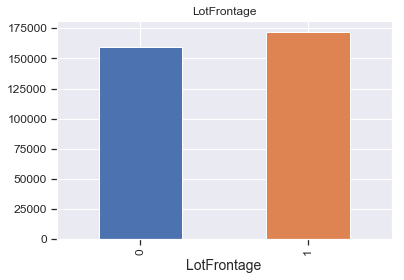

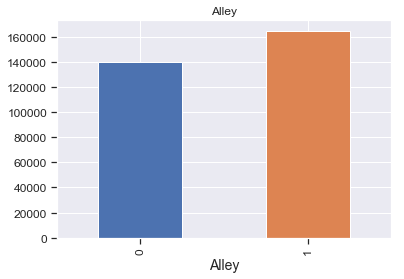

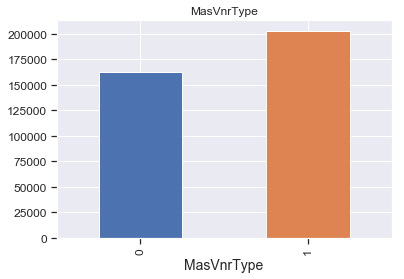

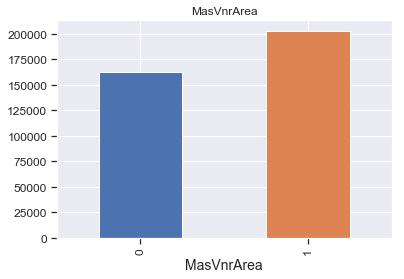

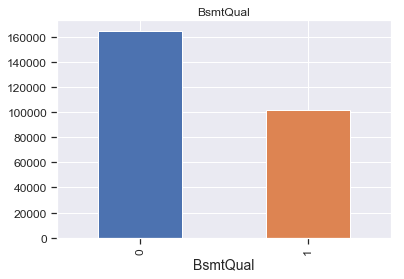

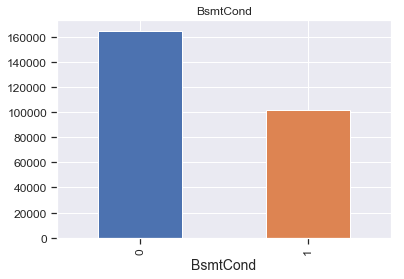

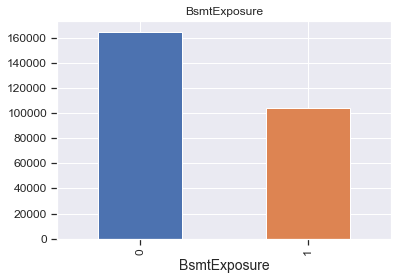

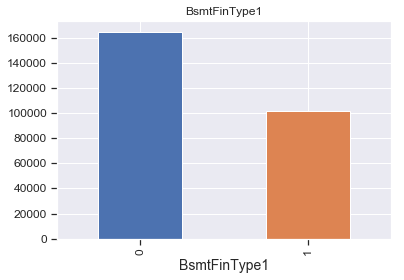

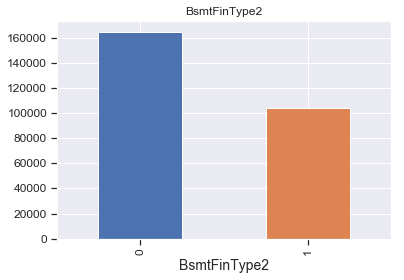

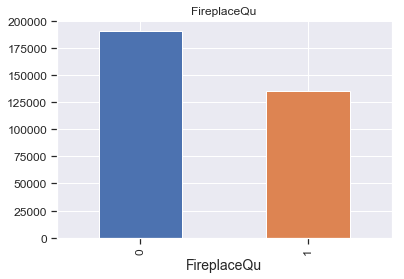

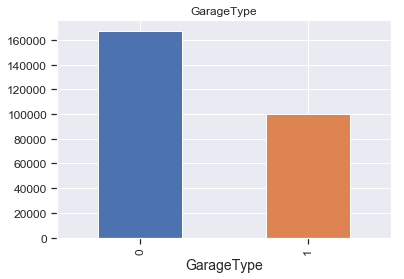

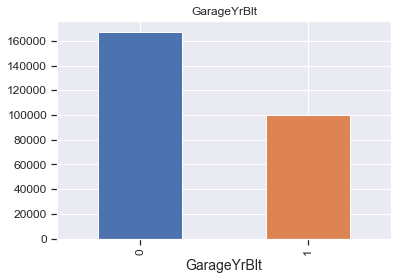

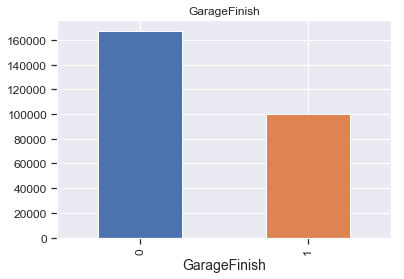

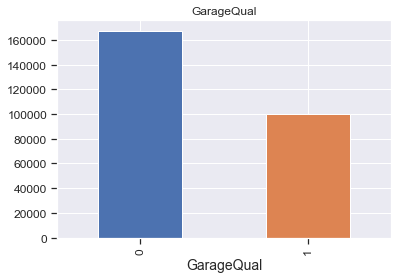

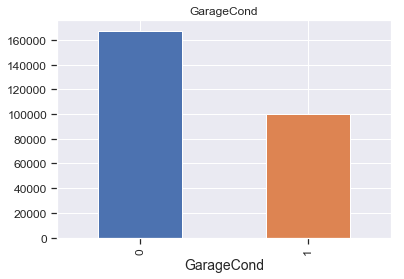

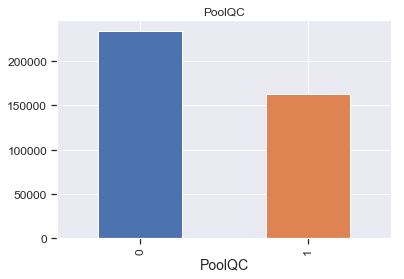

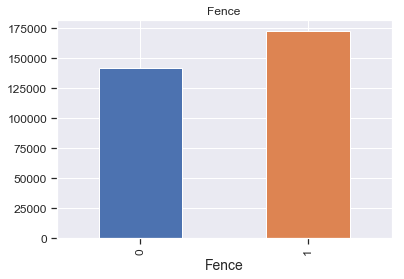

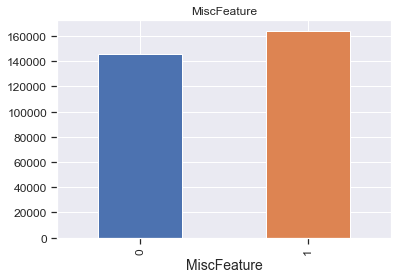

In [260]:
def summarize_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the difference in the median sale price when the observation was missing or present
    val_p = df.groupby(var)['SalePrice'].median()[1]   # Observation was present
    val_a = df.groupby(var)['SalePrice'].median()[0]   # observation was absent
    diffpercent =  100*abs(val_p-val_a)/val_p          # Find the percent difference
    print(f"For variable \"{var}\", the absence makes a {np.round(diffpercent,2)} percent difference")
    
for var in vars_with_na:
    summarize_na_value(data, var)
    
def analyse_na_value(df, var):
    df = df.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    

for var in vars_with_na:
    analyse_na_value(data, var)

We see the fact that for many variables the sale price is different depending on where the value is missing or not and hence this is important to capture when we engineer the variables in next section.

### Numerical variables

Lets find the list of various numerical variables we have in the dataset. These are vaiables which are not of type "Object" in the dataframe.

In [261]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print(f'Number of numerical variables: {len(num_vars)}')

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


** Lets find the various columns with high degree of variation in the data, i.e too many unique values. Be cautious because some continuous variables will be completely unique and that is still OK **

In [262]:
def vars_value_changes(data, uniquefrac=0.9):
    # make a list of the variables with high fraction of unique values
    vars_with_highunique = [var for var in data.columns if len(data[var].unique()) > (uniquefrac*len(data))]

    # print the variable name and the percentage of missing values
    print(f"There are totally {len(vars_with_highunique)} columns with high fraction of unique values. Details presented below\n")
    for var in vars_with_highunique:
        print(var, np.round(100*len(data[var].unique())/len(data), 2),  ' % unique values')

In [263]:
vars_value_changes(data,uniquefrac=0.95)

There are totally 1 columns with high fraction of unique values. Details presented below

Id 100.0  % unique values


From the above view of the dataset, we notice the variable Id, which is an indicator of the house is completely unique. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset and it adds no value for out machine learning prediction.

#### Temporal variables

From the above view we also notice that we have 4 year variables. Typically, we will not use date variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold. This will be done as part of feature engineering

In [264]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [265]:
# let's explore the content of these year variables
for var in year_vars:
    print (f"For time variable {var} there are totally {data[var].nunique()} values with minimum {data[var].min()} and maximum {data[var].max()}\n")

For time variable YearBuilt there are totally 112 values with minimum 1872 and maximum 2010

For time variable YearRemodAdd there are totally 61 values with minimum 1950 and maximum 2010

For time variable GarageYrBlt there are totally 97 values with minimum 1900.0 and maximum 2010.0

For time variable YrSold there are totally 5 values with minimum 2006 and maximum 2010



We can also explore the evolution of the sale price with the years in which the house was sold as is being done in the below analysis:

Text(0.5, 1.0, 'Change in House price over the years')

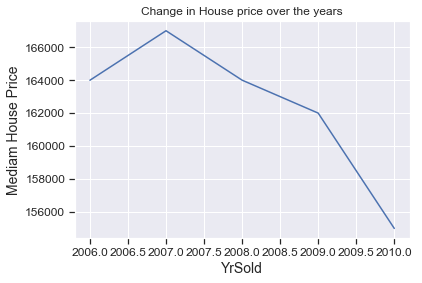

In [266]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Mediam House Price')
plt.title('Change in House price over the years')

There has been a drop in the value of the houses which is bizarre considering house prices usually increase with time.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

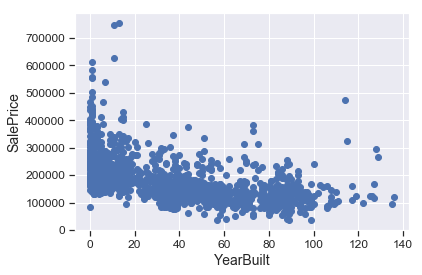

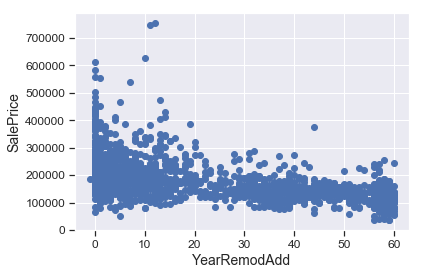

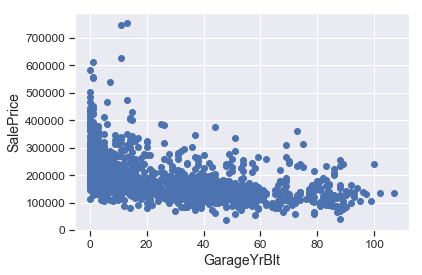

In [267]:
# let's explore the relationship between the year variables and the house price in a bit of more details
def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)
    

We see that there is a tendency to a decrease in price, with older features.

#### Discrete variable Analysis

Let's go ahead and find which variables are discrete, i.e., show a limited number of values

In [268]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<15 and var not in year_vars+['Id']]
print(f'The Number of discrete variables in dataset: {len(discrete_vars)}. Details are below: \n')

for var in discrete_vars:
    print(f"Variable \"{var}\" has {len(data[var].unique())} distinct values")

The Number of discrete variables in dataset: 13. Details are below: 

Variable "OverallQual" has 10 distinct values
Variable "OverallCond" has 9 distinct values
Variable "BsmtFullBath" has 4 distinct values
Variable "BsmtHalfBath" has 3 distinct values
Variable "FullBath" has 4 distinct values
Variable "HalfBath" has 3 distinct values
Variable "BedroomAbvGr" has 8 distinct values
Variable "KitchenAbvGr" has 4 distinct values
Variable "TotRmsAbvGrd" has 12 distinct values
Variable "Fireplaces" has 4 distinct values
Variable "GarageCars" has 5 distinct values
Variable "PoolArea" has 8 distinct values
Variable "MoSold" has 12 distinct values


In [269]:
# Visualise the discrete variables
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


We can see that these variables tend to be Qualifications or grading scales, or refer to the number of rooms, or units. Let's analyse their contribution to the house price and if there is any connnection to value of variable and prices.

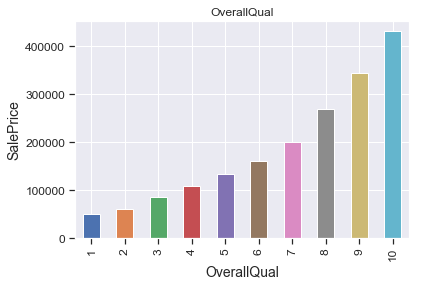

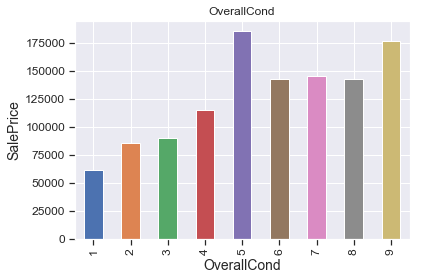

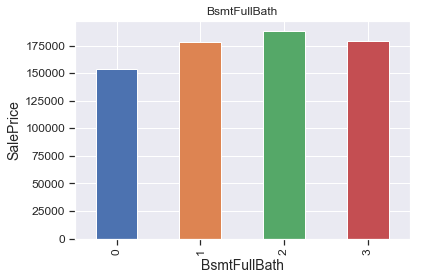

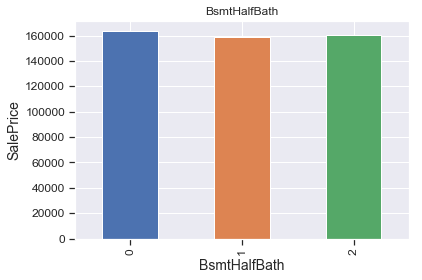

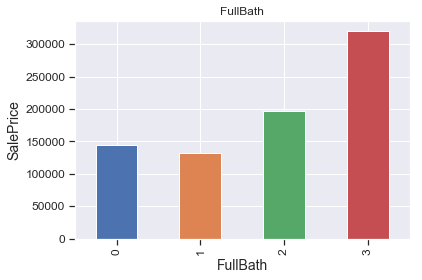

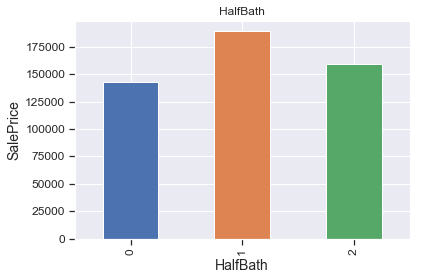

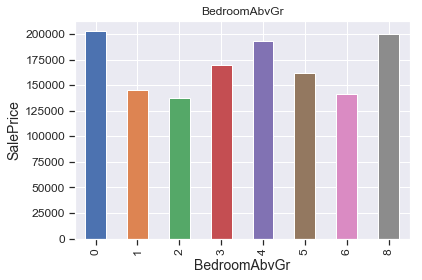

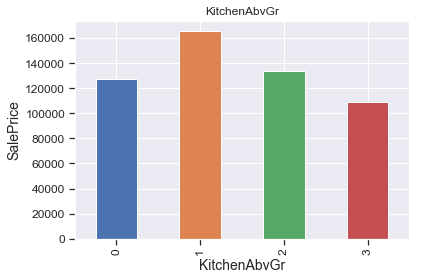

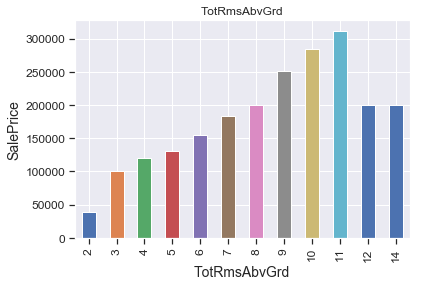

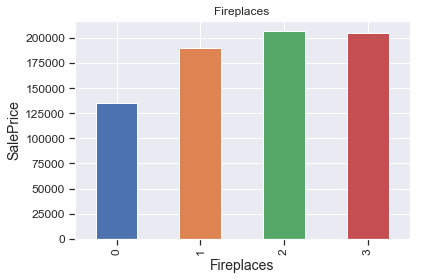

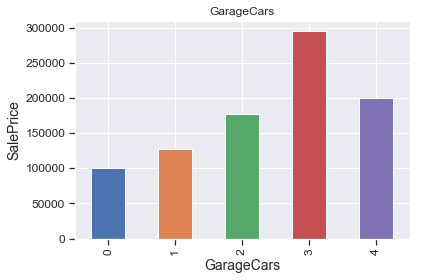

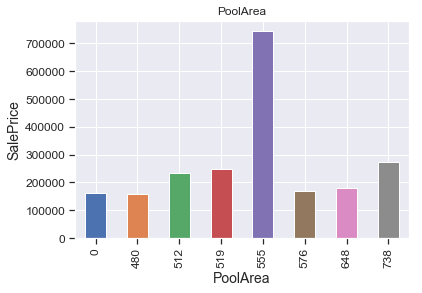

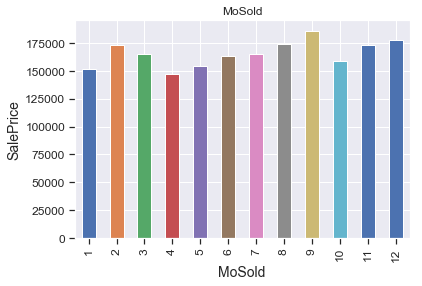

In [270]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

We see that there is a relationship between the variable numbers and the SalePrice, but this relationship is not always monotonic. 

For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.  

However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, favour better selling prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract the most for a linear model. 

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider variables as continuous if they are not temporal or discrete variables in our dataset. There is some element of subjectivity in this thought process, but this is acceptable.

In [271]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 20


In [272]:
# let's visualise the continuous variables
data[cont_vars].head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


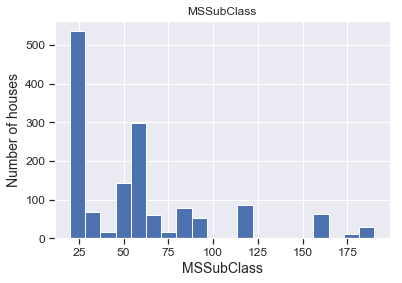

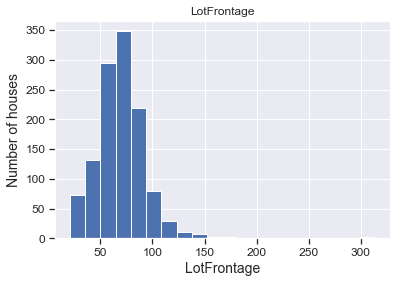

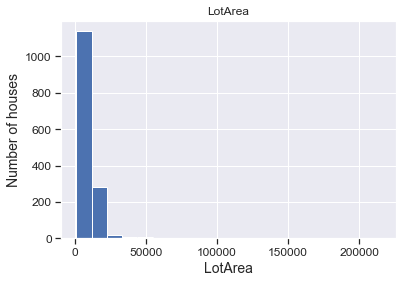

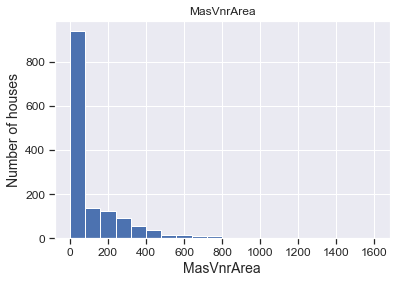

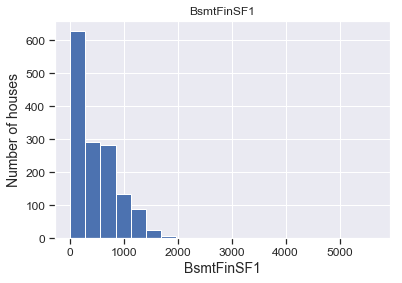

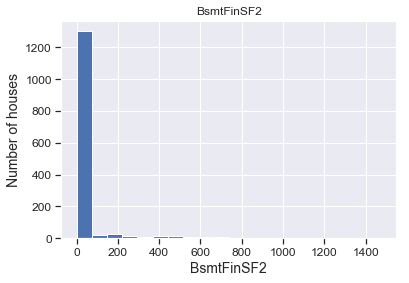

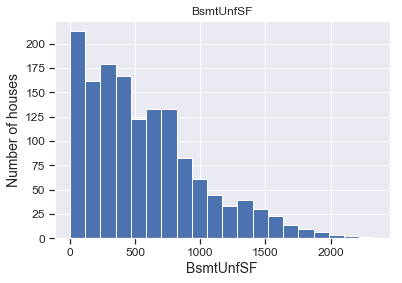

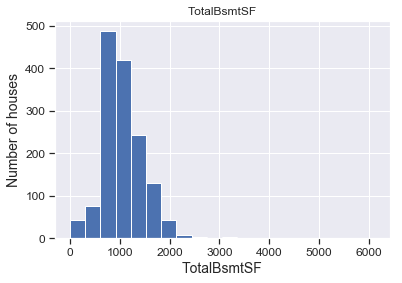

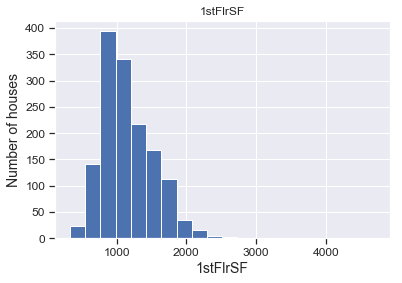

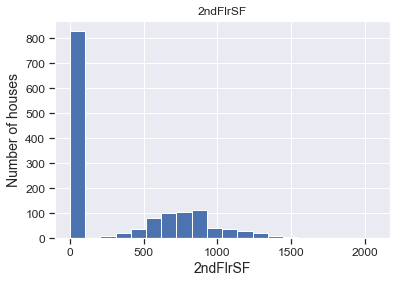

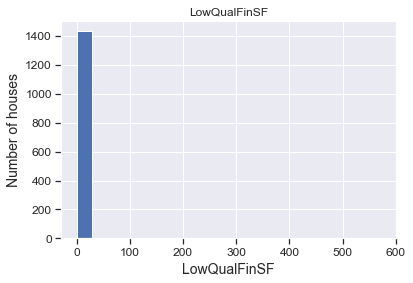

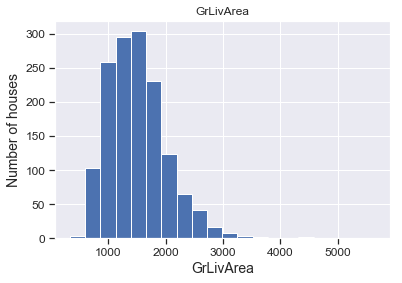

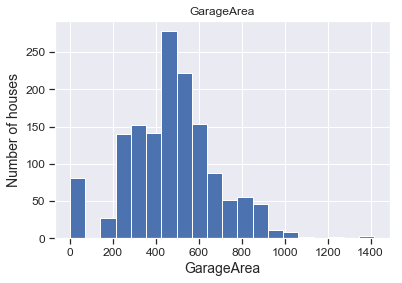

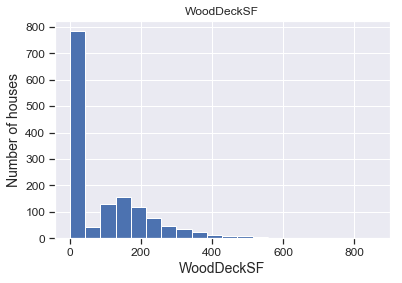

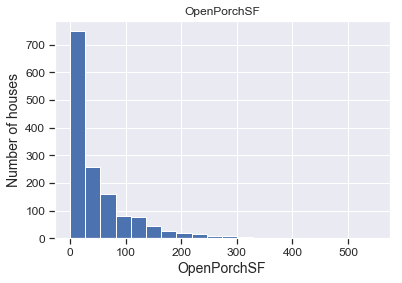

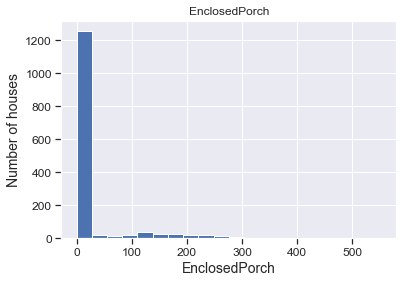

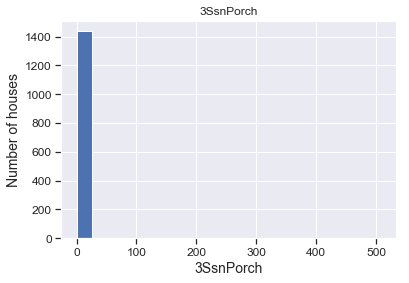

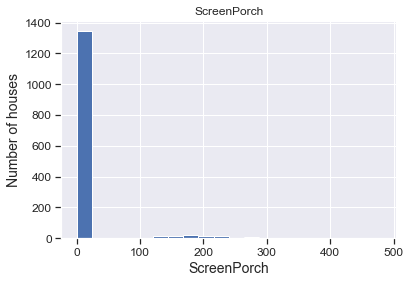

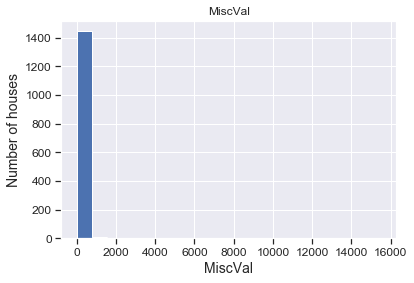

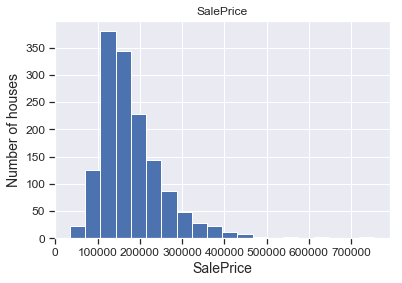

In [273]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. For linear models to perform best, we need to account for non-Gaussian distributions. We will transform our variables in the next section on feature engineering.

Let's also evaluate here, if a log transformation renders the variables more Gaussian looking:

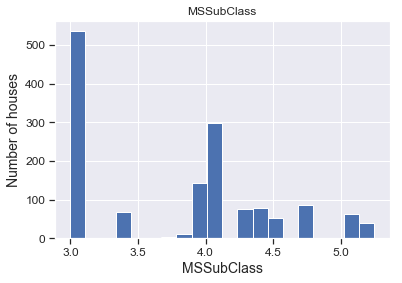

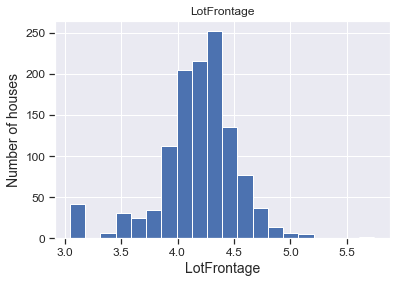

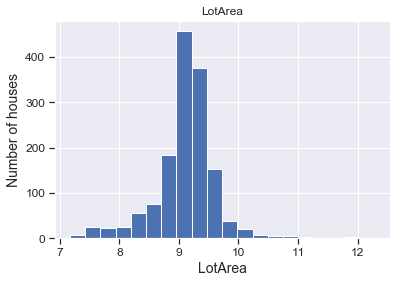

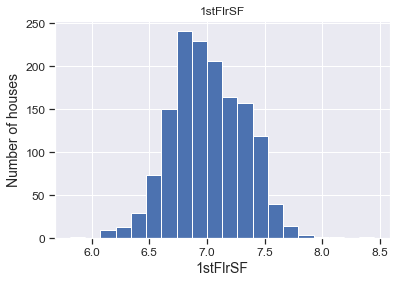

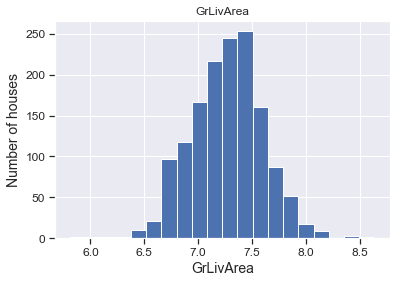

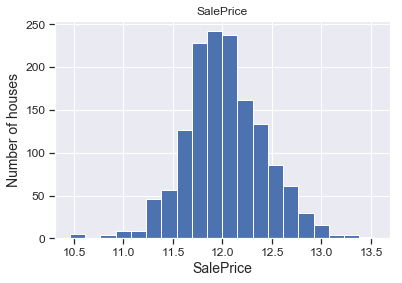

In [274]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data, var)

We get a better spread of values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model and will be done.

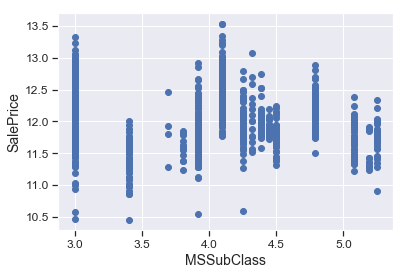

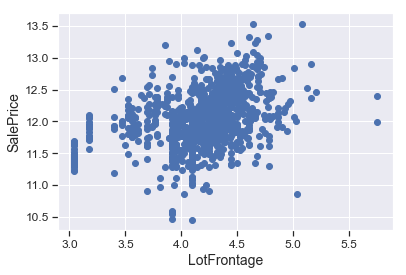

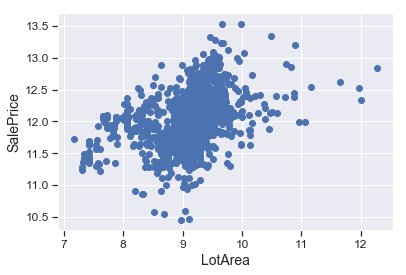

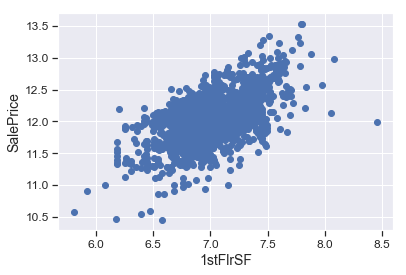

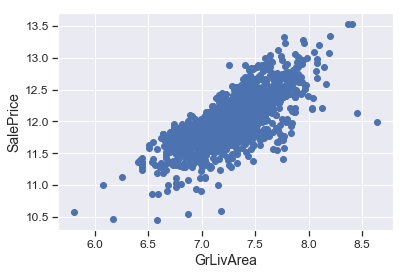

In [275]:
# let's explore the relationship between the house price and the transformed variables with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()
    
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(data, var)

From the previous plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

#### Outliers

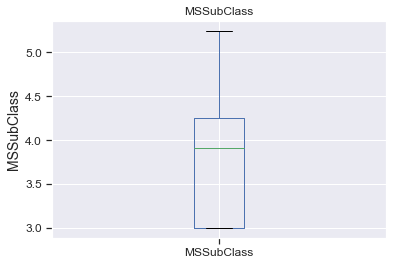

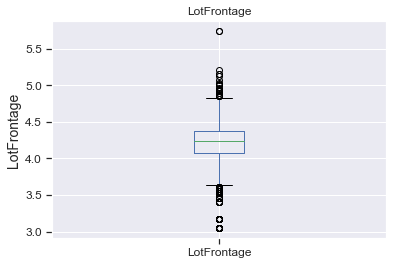

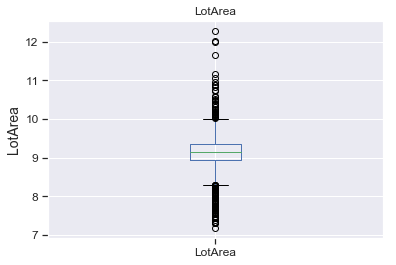

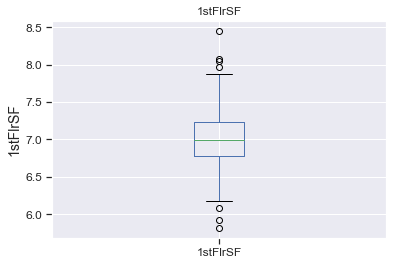

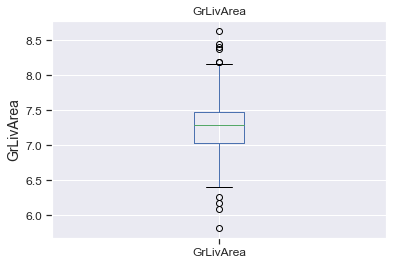

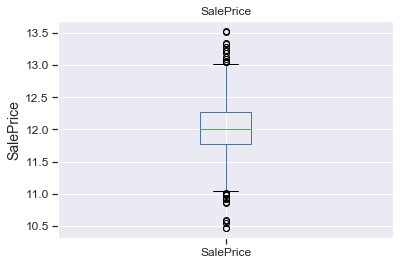

In [276]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset we have.

In [277]:
### Categorical variables

cat_vars = [var for var in data.columns if data[var].dtypes=='O']

print(f'Number of categorical variables: {len(cat_vars)}')

# let's visualise the values of the categorical variables
data[cat_vars].head()

Number of categorical variables: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Number of labels: cardinality

Let's evaluate how many different categories (Called cardinality) are present in each of the categorical variables.

In [278]:
for var in cat_vars:
    print(f"Variable \"{var}\" has {len(data[var].unique())} unique categories")

Variable "MSZoning" has 5 unique categories
Variable "Street" has 2 unique categories
Variable "Alley" has 3 unique categories
Variable "LotShape" has 4 unique categories
Variable "LandContour" has 4 unique categories
Variable "Utilities" has 2 unique categories
Variable "LotConfig" has 5 unique categories
Variable "LandSlope" has 3 unique categories
Variable "Neighborhood" has 25 unique categories
Variable "Condition1" has 9 unique categories
Variable "Condition2" has 8 unique categories
Variable "BldgType" has 5 unique categories
Variable "HouseStyle" has 8 unique categories
Variable "RoofStyle" has 6 unique categories
Variable "RoofMatl" has 8 unique categories
Variable "Exterior1st" has 15 unique categories
Variable "Exterior2nd" has 16 unique categories
Variable "MasVnrType" has 5 unique categories
Variable "ExterQual" has 4 unique categories
Variable "ExterCond" has 5 unique categories
Variable "Foundation" has 6 unique categories
Variable "BsmtQual" has 5 unique categories
Varia

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering part. High cardinality can cause problems with modeling and needs special attention.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [279]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()


MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We need to re-engineer these variables. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models and need to be removed from the data set.

Finally, we want to explore the relationship between the categories of the different variables and the house price:

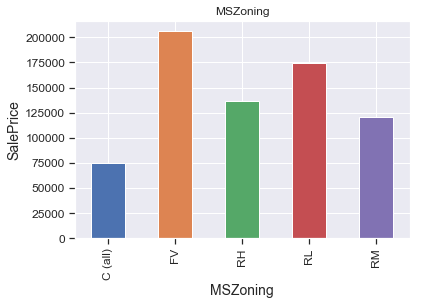

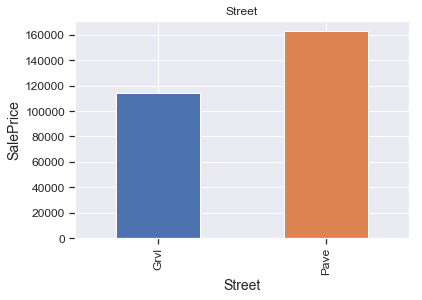

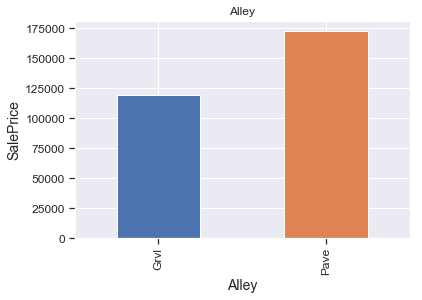

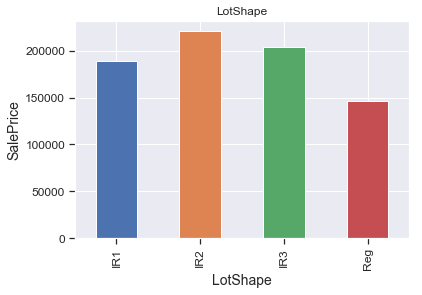

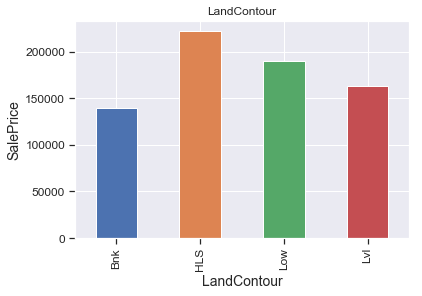

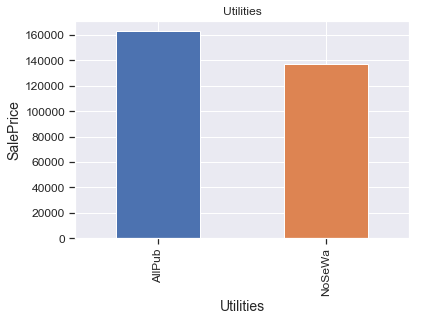

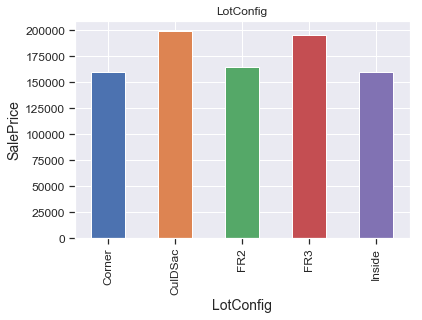

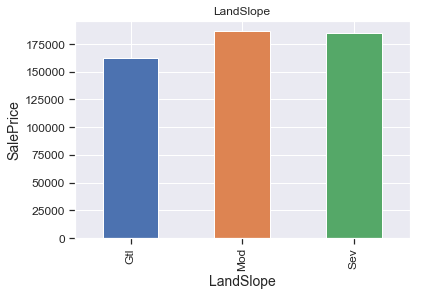

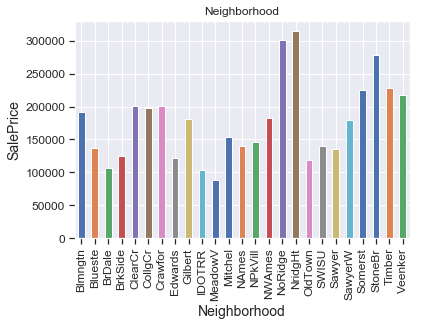

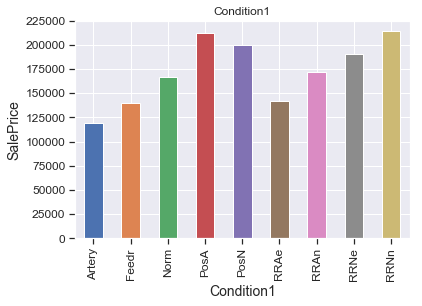

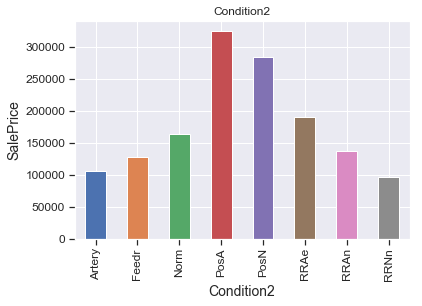

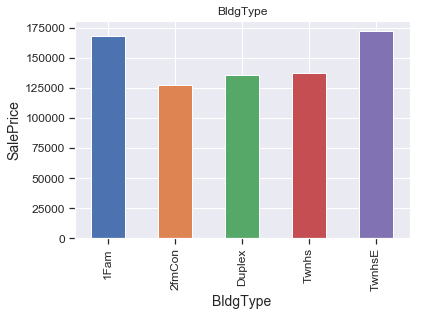

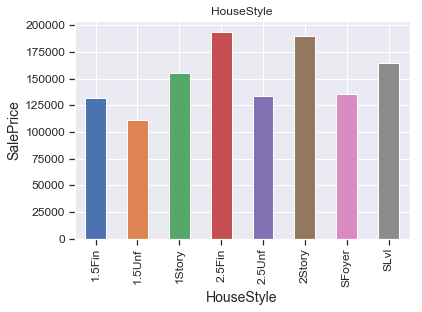

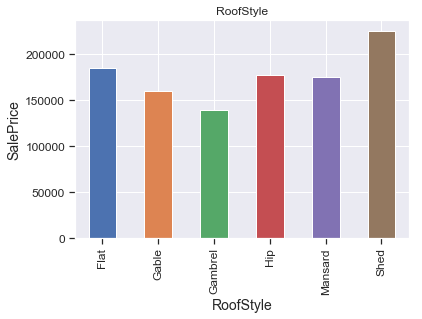

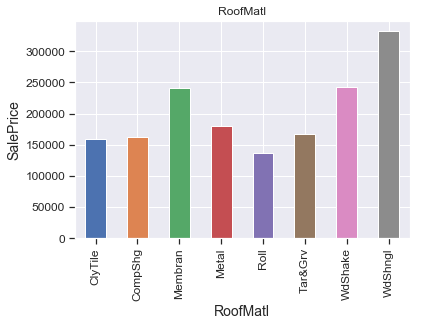

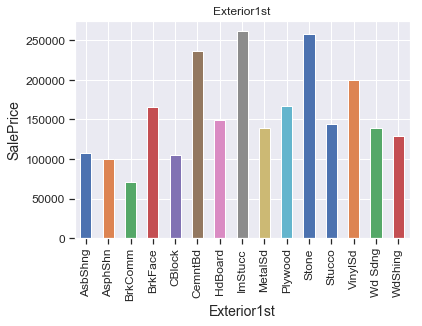

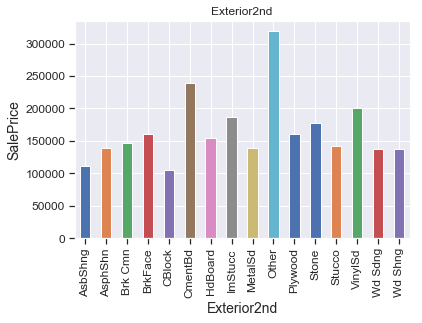

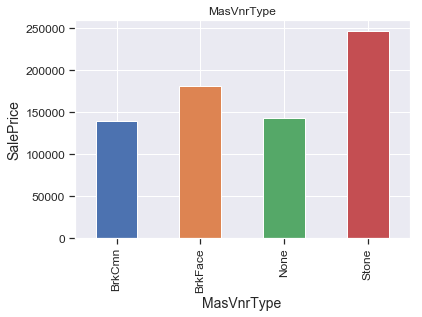

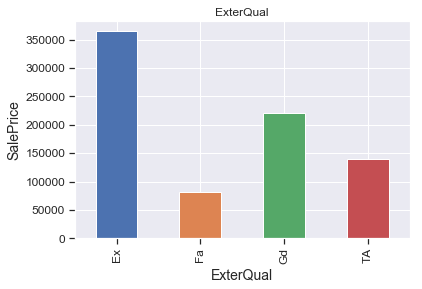

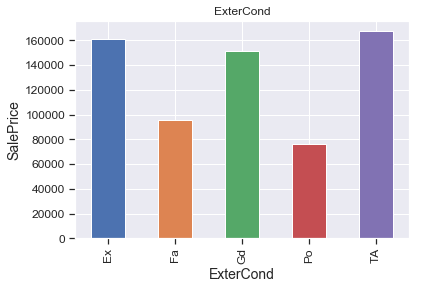

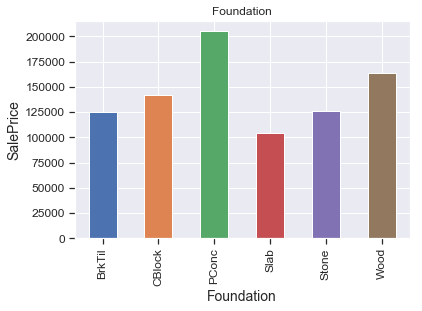

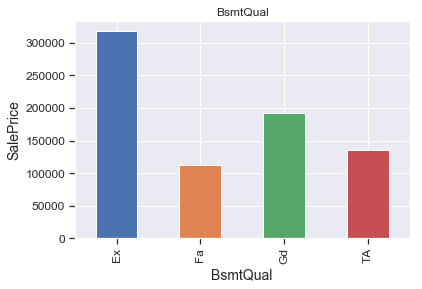

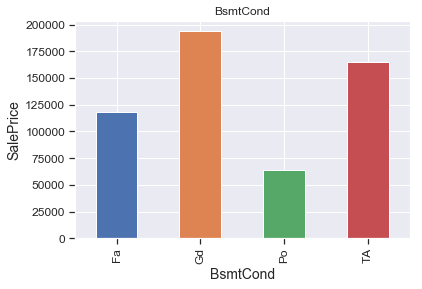

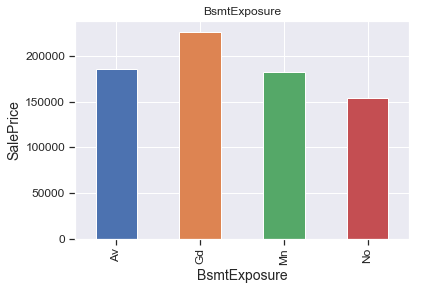

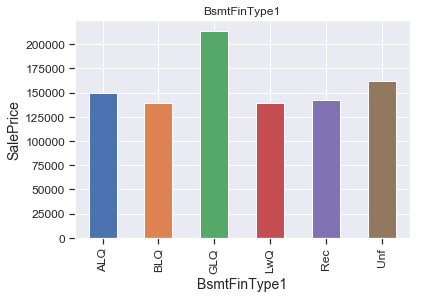

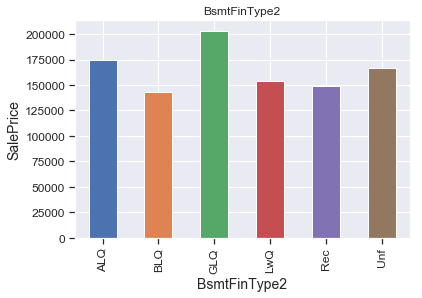

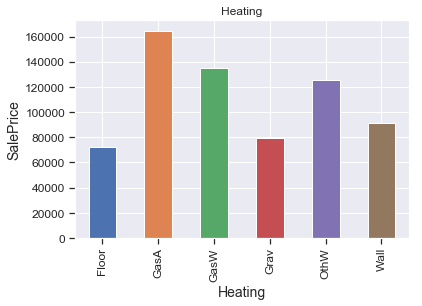

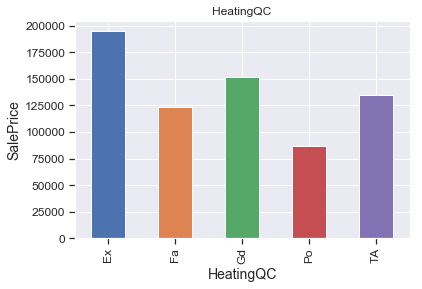

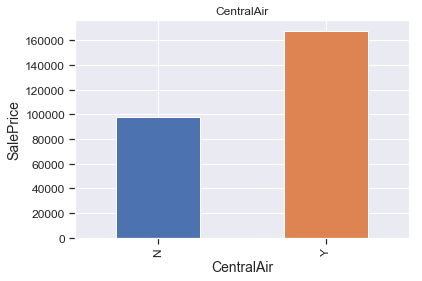

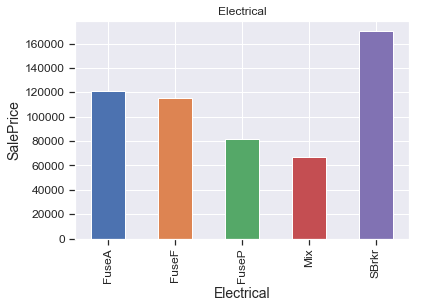

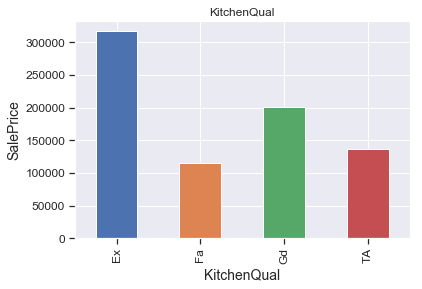

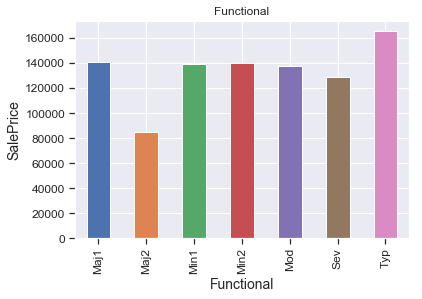

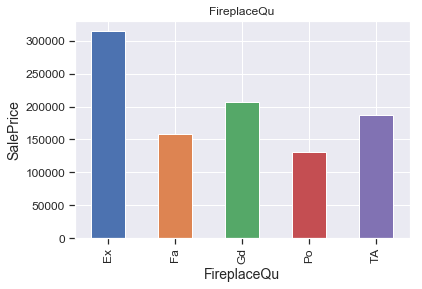

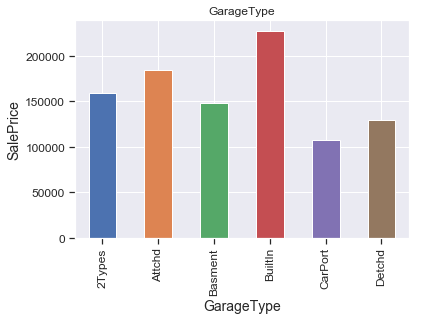

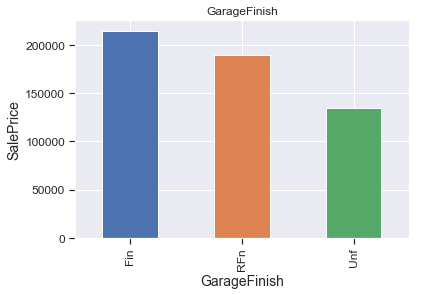

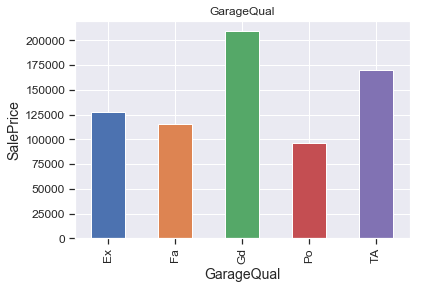

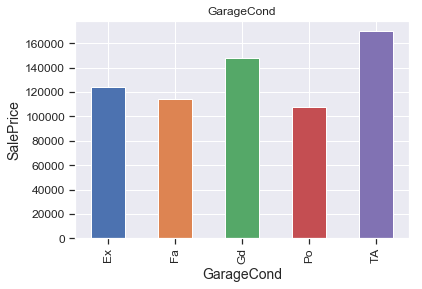

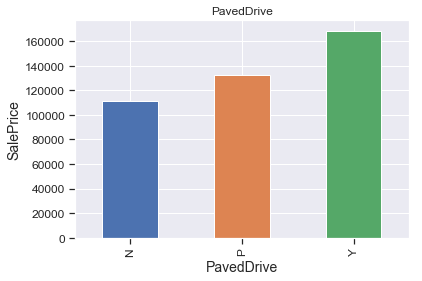

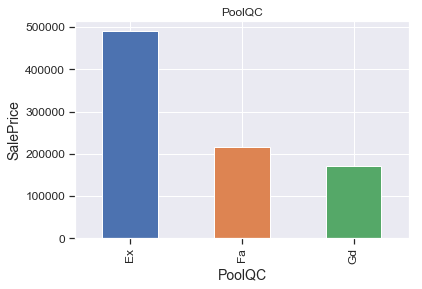

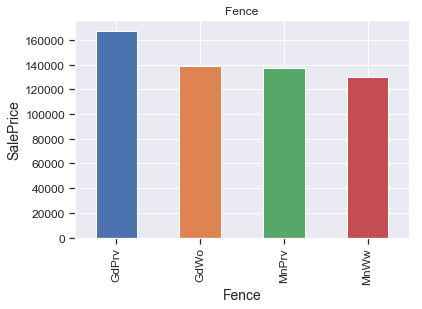

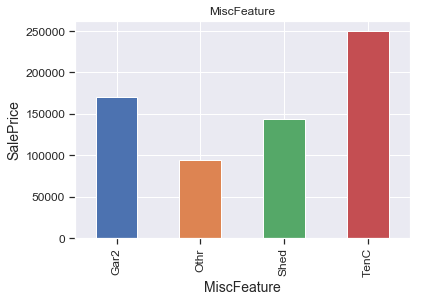

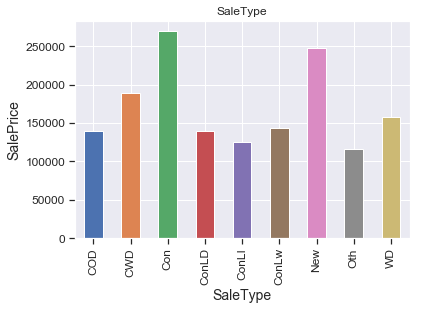

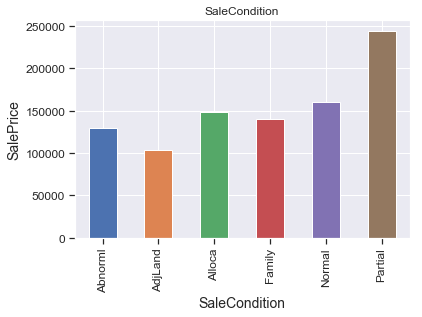

In [280]:
for var in cat_vars:
    analyse_discrete(data, var)

Clearly, the categories give information on the SalePrice.

#### Highly correlated variables:

Let's go ahead and investigate how the variables are correlated to one another and with the sale price using pearson correlation coefficient.

In [281]:
print("Pearson Correlation Matrix")
data.corr(method='pearson')

Pearson Correlation Matrix


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [282]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [283]:
subdata = data[cont_vars]
print(get_top_abs_correlations(subdata, n=8))

TotalBsmtSF  1stFlrSF       0.819530
GrLivArea    SalePrice      0.708624
2ndFlrSF     GrLivArea      0.687501
GarageArea   SalePrice      0.623431
TotalBsmtSF  SalePrice      0.613581
1stFlrSF     SalePrice      0.605852
             GrLivArea      0.566024
BsmtFinSF1   TotalBsmtSF    0.522396
dtype: float64


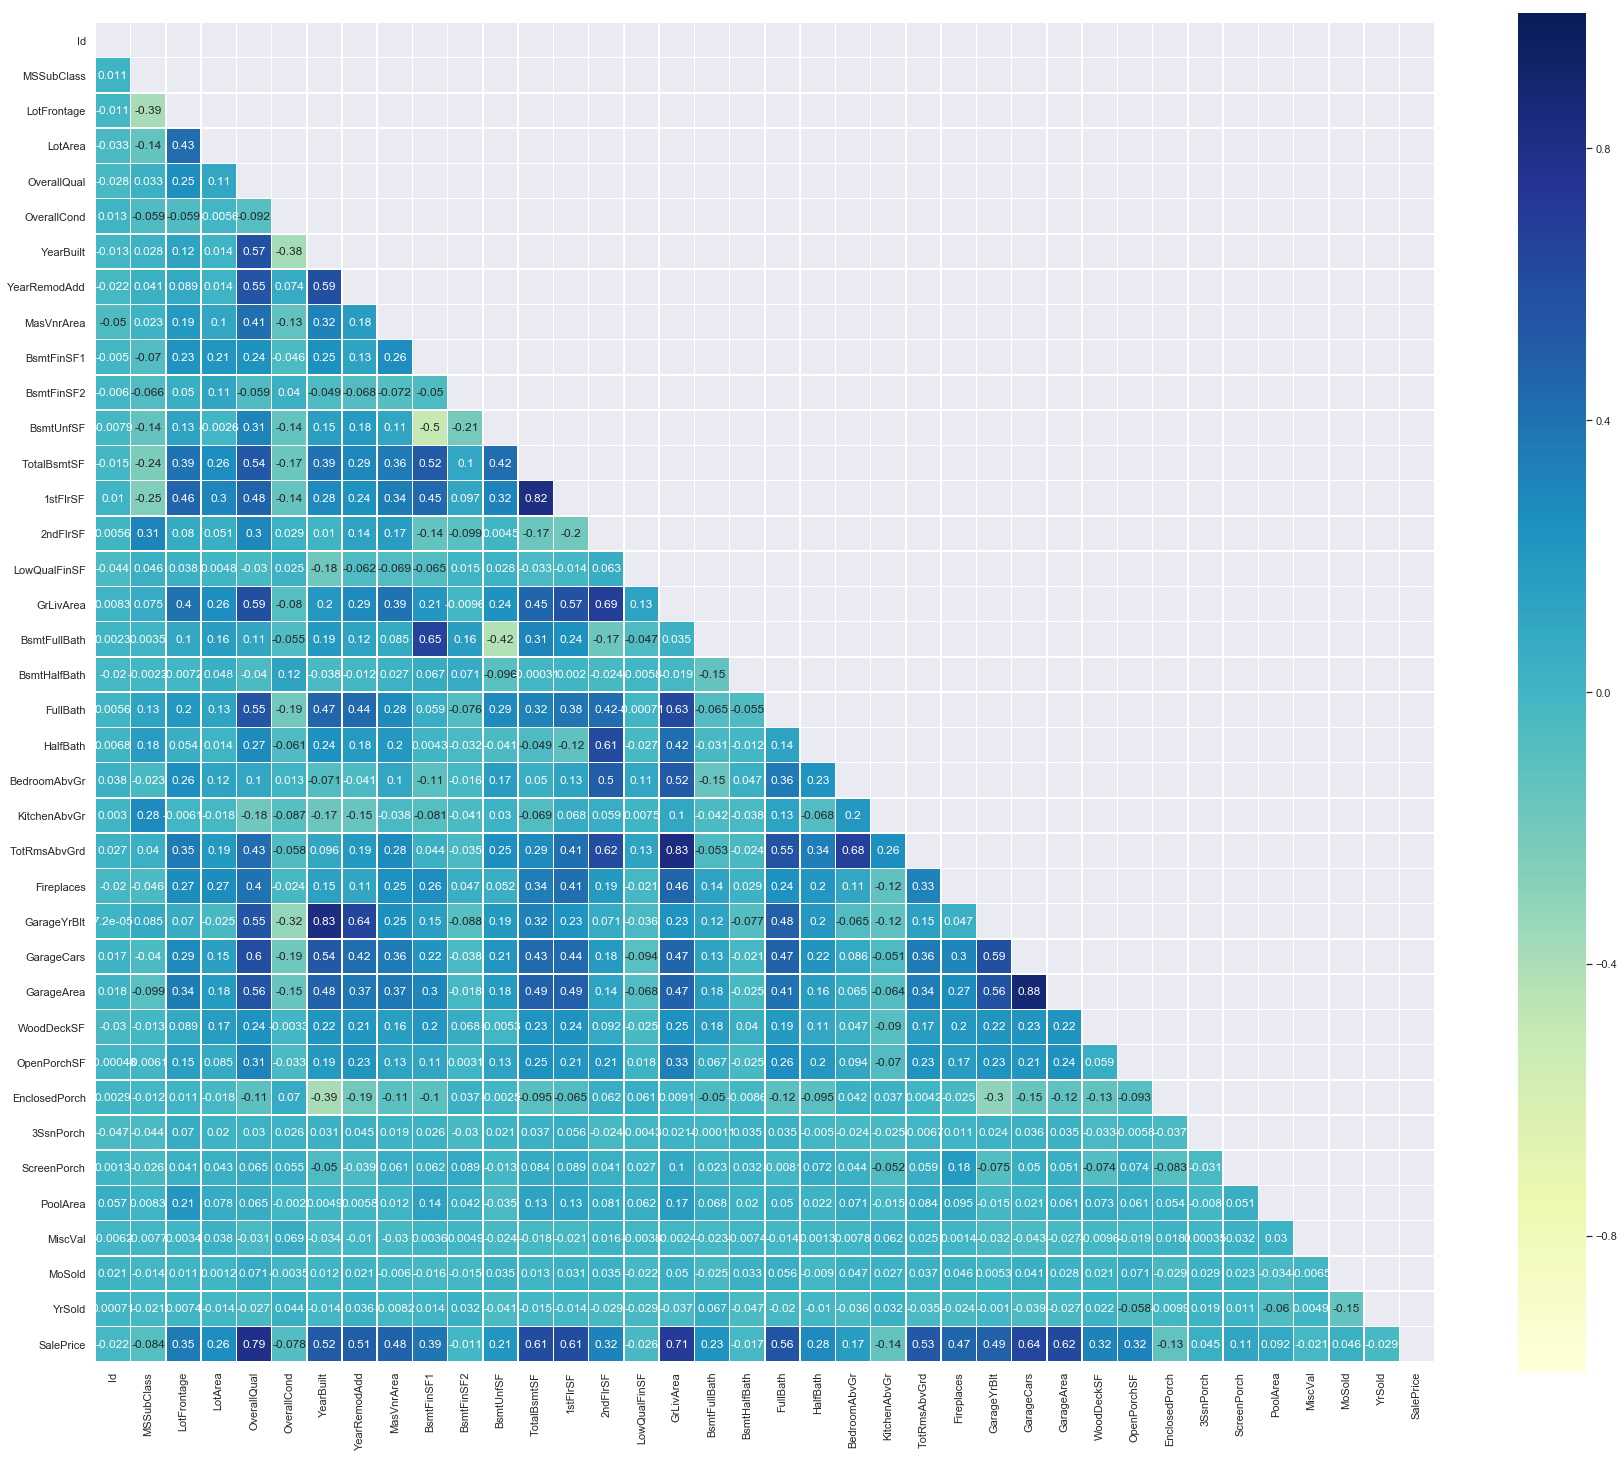

In [284]:
import seaborn as sns
sns.set()

corr_matrix = data.corr(method='pearson')
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 25)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      cmap="YlGnBu",
                      square = True,
                      linewidths = .5,
                      vmin = -1, 
                      vmax = 1,
                      annot = True)
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})